# Data Cleaning

In [124]:
# importing libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [125]:
# bringing in data 
data = pd.read_csv("final_stocks_data.csv")
data.head(20)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618004,24282400.0
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0
5,2022-01-03 00:00:00+00:00,T,18.716011,19.320242,18.716011,19.206949,15.772990,76970210.0
6,2022-01-03 00:00:00+00:00,PG,161.690002,162.940002,159.880005,162.899994,151.253021,9317300.0
7,2022-01-03 00:00:00+00:00,PFE,58.500000,58.549999,56.340000,56.650002,50.231384,57219200.0
8,2022-01-03 00:00:00+00:00,PEP,172.199997,173.190002,170.570007,172.979996,160.040619,5488900.0
9,2022-01-03 00:00:00+00:00,NKE,167.529999,167.910004,163.309998,164.669998,158.935150,5670500.0


In [126]:
# Checking for nan
data.isna().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [127]:
data.isnull().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [128]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15030.000000,15030.000000,15030.000000,15030.000000,15030.000000,1.503000e+04
mean,151.041353,152.886914,149.192466,151.074372,147.677890,3.827113e+07
std,116.481232,118.023740,114.934290,116.514823,116.721466,9.567232e+07
min,10.971000,11.735000,10.813000,11.227000,11.216744,9.427000e+05
25%,60.317501,60.869999,59.925000,60.415000,57.215084,5.513700e+06
50%,124.389999,125.935001,122.814999,124.445000,118.864254,1.212425e+07
75%,186.334999,188.622505,184.284996,186.562500,184.053253,2.905650e+07
max,630.409973,633.890015,623.000000,633.659973,633.659973,1.543911e+09


In [129]:
data.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [130]:
# removing for outliers
def remove_outliers_zscore(data, numerical_cols, threshold=3):
    """
    Removes outliers from the given DataFrame using the Z-score method.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing the data.
    numerical_cols : list
        List of numerical columns to check for outliers.
    threshold : float, optional (default=3)
        The Z-score threshold to use for outlier detection.

    Returns:
    --------
    pd.DataFrame
        A new DataFrame with outliers removed.
    """
    # Calculate Z-scores for the numerical columns
    z_scores = data[numerical_cols].apply(zscore)

    # Create a mask for non-outliers (Z-scores within the threshold)
    mask = (np.abs(z_scores) < threshold).all(axis=1)

    # Return the filtered DataFrame without outliers
    return data[mask]

# calling the function
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_cleaned = remove_outliers_zscore(data, numerical_cols)

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Optional: Save the cleaned data to a CSV




Original data shape: (15030, 8)
Cleaned data shape: (14293, 8)


In [131]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14293 non-null  object 
 1   Symbol     14293 non-null  object 
 2   Open       14293 non-null  float64
 3   High       14293 non-null  float64
 4   Low        14293 non-null  float64
 5   Close      14293 non-null  float64
 6   Adj Close  14293 non-null  float64
 7   Volume     14293 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1005.0+ KB


In [132]:
data = data_cleaned

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14293 non-null  object 
 1   Symbol     14293 non-null  object 
 2   Open       14293 non-null  float64
 3   High       14293 non-null  float64
 4   Low        14293 non-null  float64
 5   Close      14293 non-null  float64
 6   Adj Close  14293 non-null  float64
 7   Volume     14293 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1005.0+ KB


In [134]:
# changing columns to correct data types
data["Date"] = pd.to_datetime(data["Date"])

In [135]:
# removing space and switching to lowercase
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       14293 non-null  datetime64[ns, UTC]
 1   symbol     14293 non-null  object             
 2   open       14293 non-null  float64            
 3   high       14293 non-null  float64            
 4   low        14293 non-null  float64            
 5   close      14293 non-null  float64            
 6   adj_close  14293 non-null  float64            
 7   volume     14293 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1005.0+ KB


In [137]:
# checking for duplicates 
duplicates = data.duplicated().sum()

In [138]:
data.head()

,date,symbol,open,high,low,close,adj_close,volume
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0
1,2022-01-03 00:00:00+00:00,XOM,61.240002,63.599998,61.209999,63.540001,57.618004,24282400.0
2,2022-01-03 00:00:00+00:00,VZ,52.070000,52.560001,51.980000,52.439999,43.423004,18240100.0
3,2022-01-03 00:00:00+00:00,V,217.520004,222.059998,217.009995,221.429993,216.793564,7694500.0
4,2022-01-03 00:00:00+00:00,TSLA,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0


In [139]:
# transfer to another csv file for Tableau for further Visualization
data.to_csv("data_cleaned.csv", index=False)

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


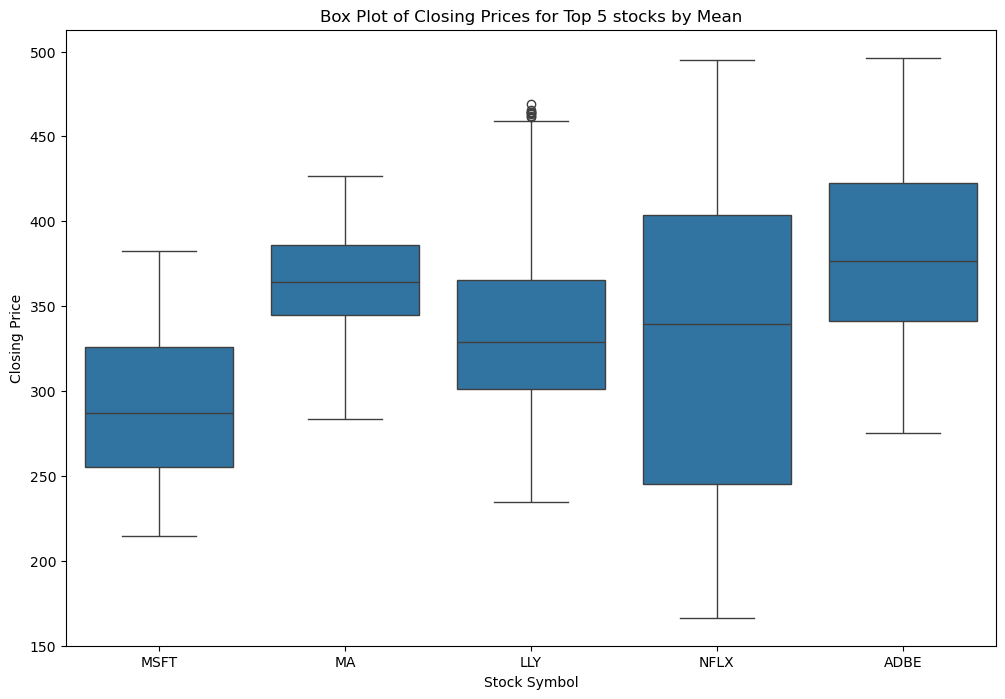

In [141]:
top_symbols = data.groupby('symbol')['close'].mean().nlargest(5).index
data['symbol'].value_counts().head(5).index

# Filter the data to only include the top 5 symbols
top_symbols_data = data[data['symbol'].isin(top_symbols)]

# Create box plots for 'Close' prices of the top 5 symbols to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x='symbol', y='close', data=top_symbols_data)
plt.title("Box Plot of Closing Prices for Top 5 stocks by Mean")
plt.xlabel("Stock Symbol")
plt.ylabel("Closing Price")
plt.show()

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14293 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       14293 non-null  datetime64[ns, UTC]
 1   symbol     14293 non-null  object             
 2   open       14293 non-null  float64            
 3   high       14293 non-null  float64            
 4   low        14293 non-null  float64            
 5   close      14293 non-null  float64            
 6   adj_close  14293 non-null  float64            
 7   volume     14293 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1005.0+ KB


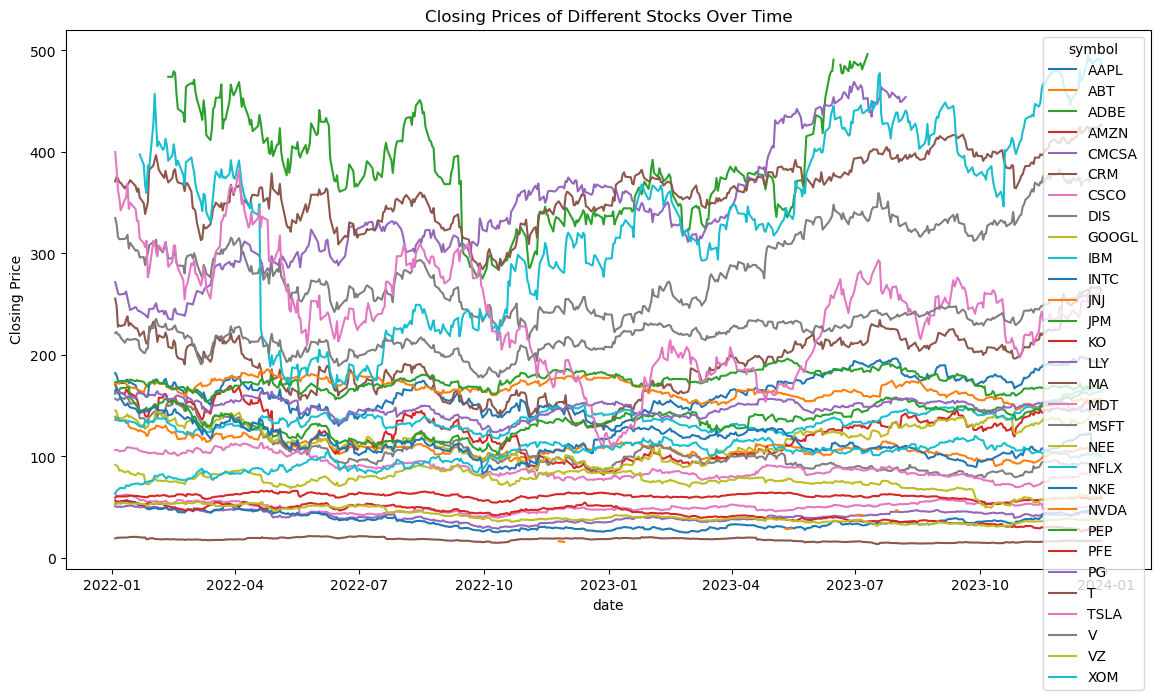

In [143]:
# Assuming 'Date' is the date column and 'Stock' indicates different stocks
data['date'] = pd.to_datetime(data['date'])

# Pivot the data to have stocks as columns
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of Different Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


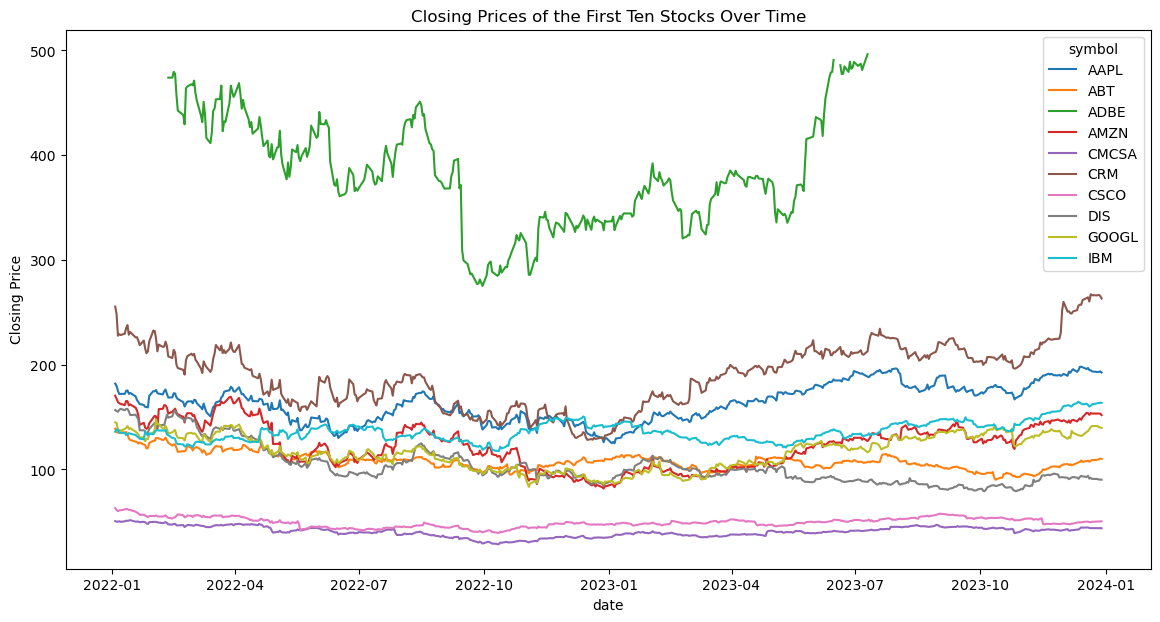

In [144]:
#for the first ten stocks
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[:10]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of the First Ten Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()



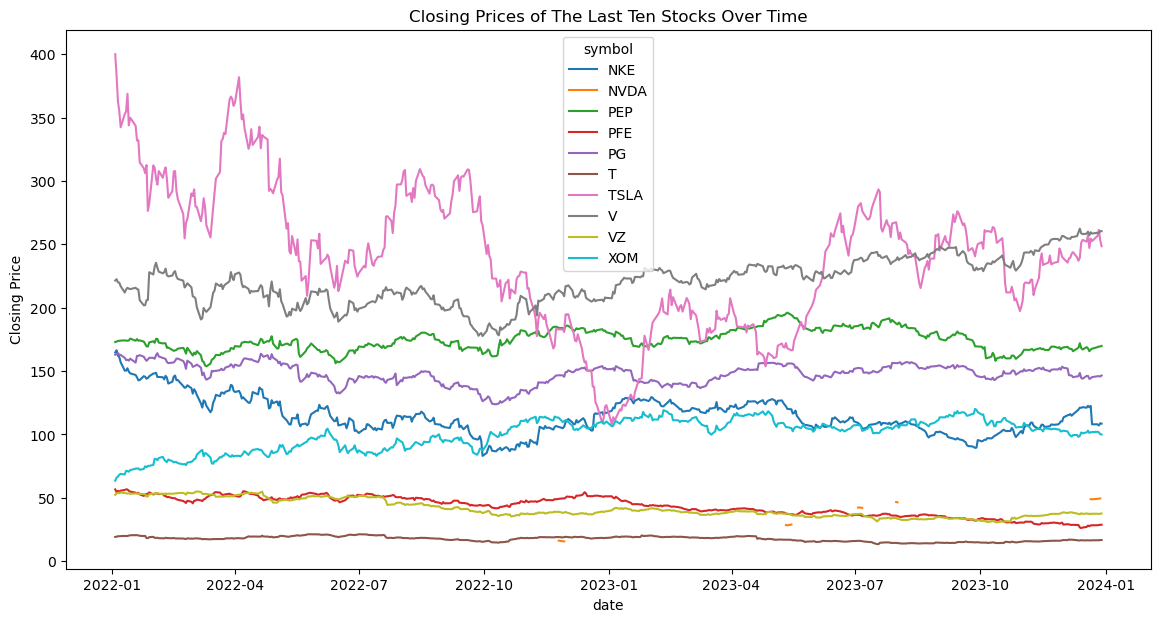

In [145]:
# for the last 10
closing_prices = data.pivot(index='date', columns='symbol', values='close')

# Plot the data
plt.figure(figsize=(14, 7))
for stock in closing_prices.columns[20:30]:
    plt.plot(closing_prices.index, closing_prices[stock], label=stock)
plt.title('Closing Prices of The Last Ten Stocks Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(title='symbol')
plt.show()


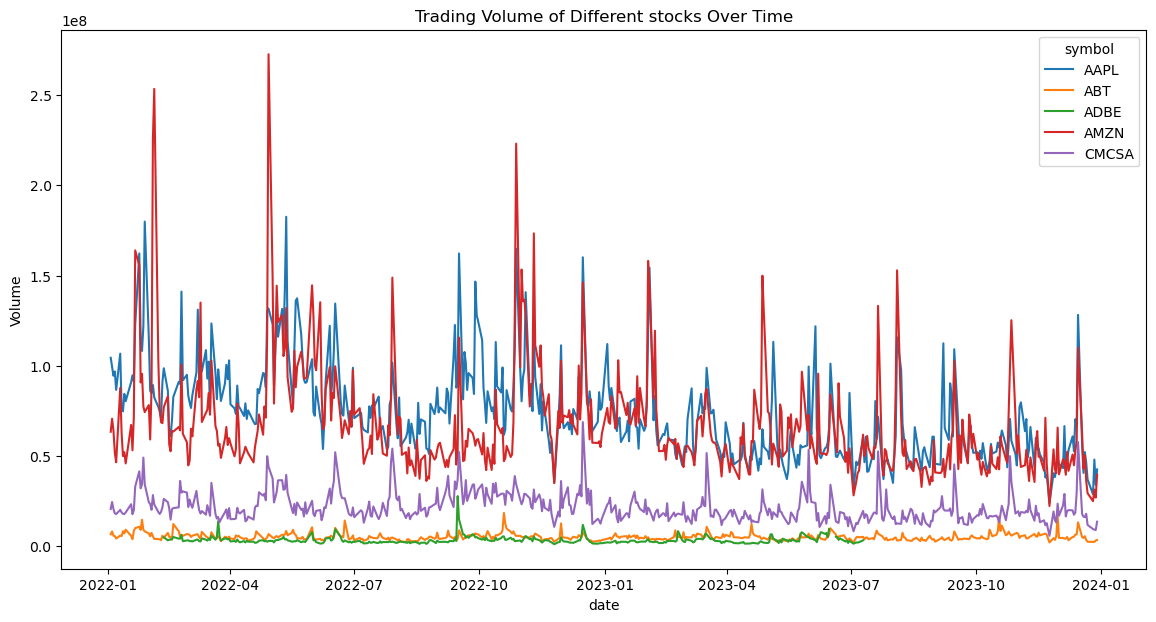

In [146]:
#stock volume over time
volumes = data.pivot(index='date', columns='symbol', values='volume')

# Plot
plt.figure(figsize=(14, 7))
for symbol in volumes.columns[:5]:
    plt.plot(volumes.index, volumes[symbol], label=symbol)
plt.title('Trading Volume of Different stocks Over Time')
plt.xlabel('date')
plt.ylabel('Volume')
plt.legend(title='symbol')
plt.show()


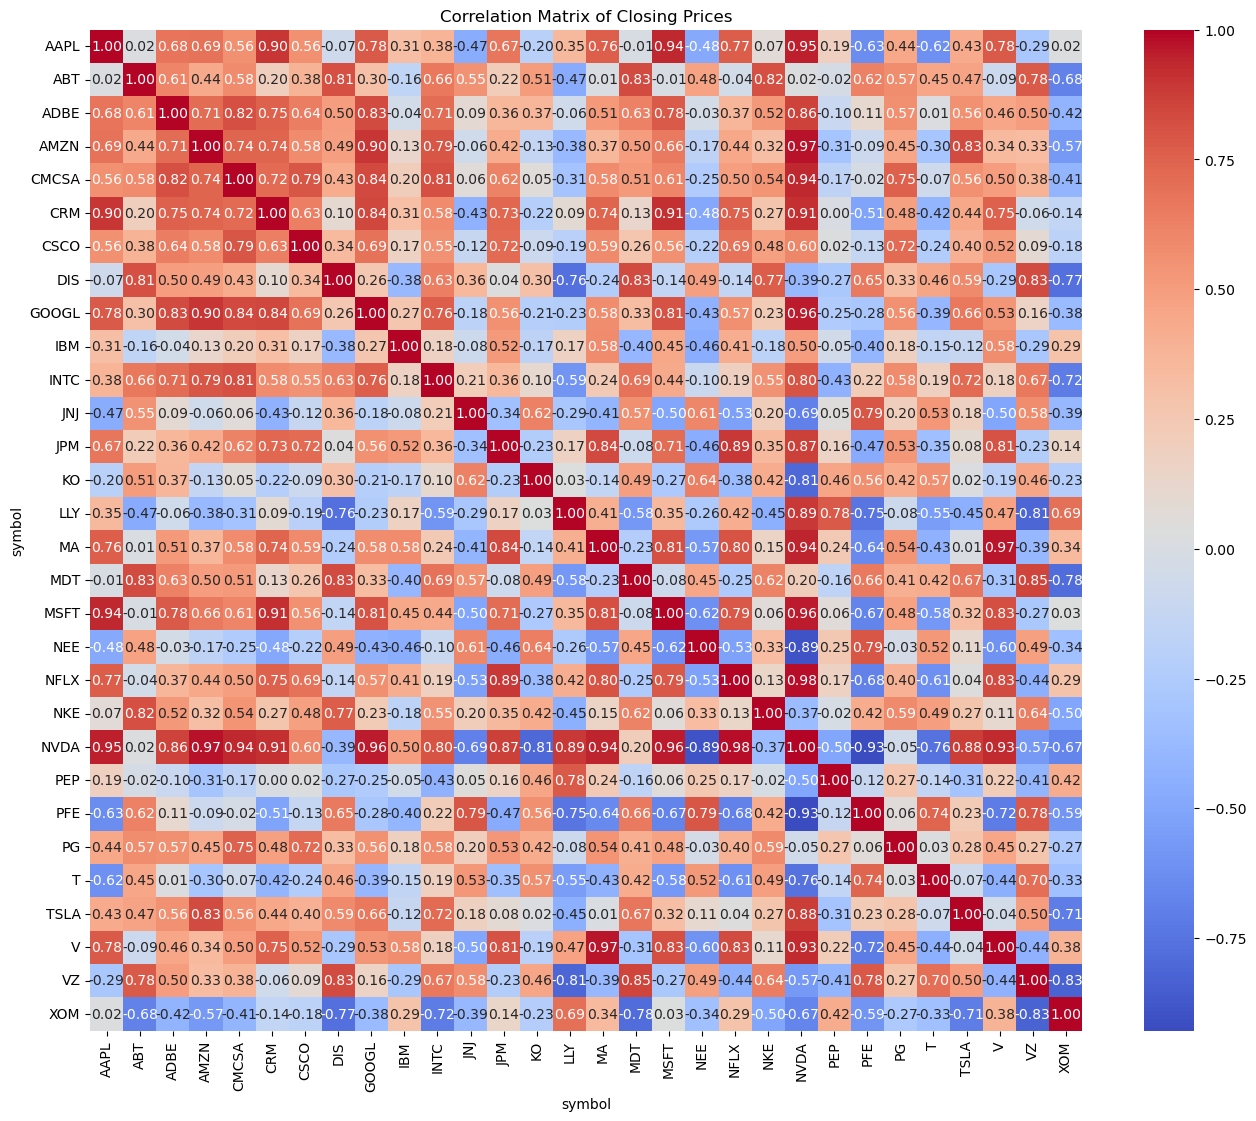

In [147]:
# Calculate the correlation matrix
corr_matrix = closing_prices.corr()

# Plot heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Closing Prices')
plt.show()


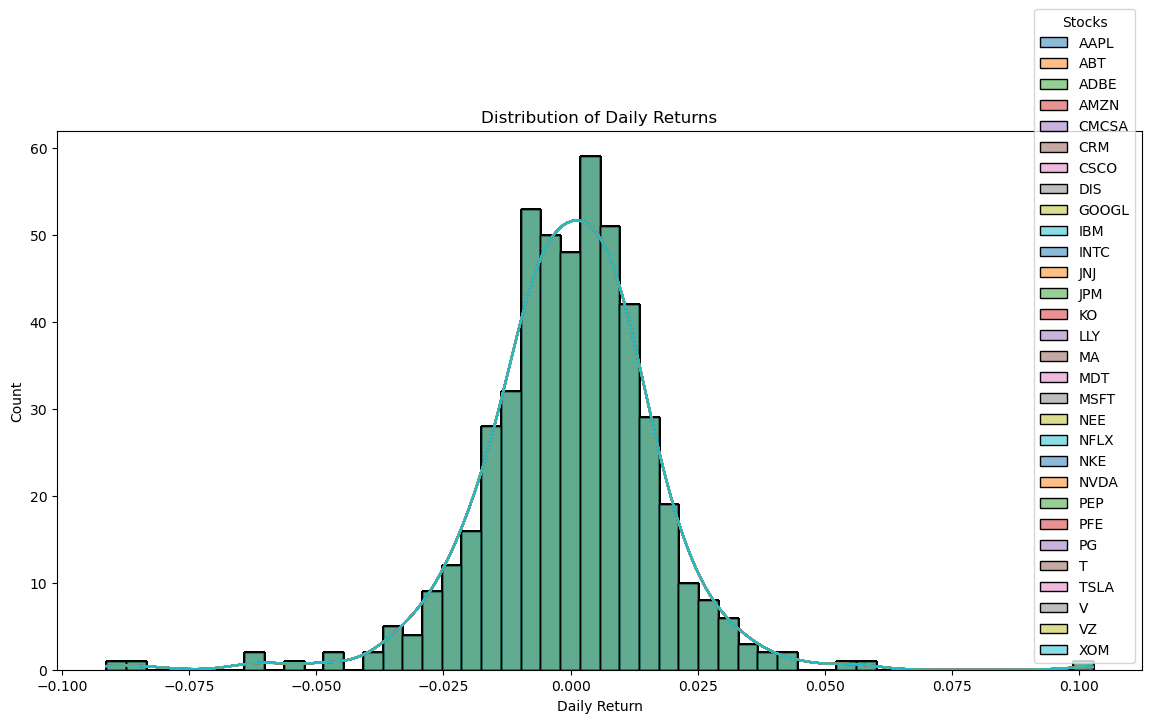

In [148]:
# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Plot distribution of daily returns for each stock
plt.figure(figsize=(14, 7))
for stock in daily_returns.columns:
    sns.histplot(daily_returns[symbol], kde=True, label=stock, bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.legend(title='Stocks')
plt.show()


## FEATURE ENGINEERING

In [149]:
# Ensure Date is in datetime format
data['date'] = pd.to_datetime(data['date'])

In [150]:
# Sort data by Symbol and Date
data = data.sort_values(by=['symbol', 'date'])

### Daily Returns:

- Measures how much the stock price changes between consecutive days. This helps in understanding daily volatility.

In [151]:
# 1. Calculate Daily Returns
data['daily_return'] = data.groupby('symbol')['close'].transform(lambda x: x.pct_change())

### Moving Averages (SMA & EMA):

- SMA provides a smooth average price over a period, while EMA assigns more weight to recent prices, making it more responsive to changes.

In [152]:
grouped = data.groupby('symbol')

In [153]:
# 2. Simple Moving Averages (SMA)
# 7-day, 14-day, and 30-day rolling averages
# Use transform for rolling operations to ensure same length output
data['SMA_7'] = grouped['close'].transform(lambda x: x.rolling(window=7).mean())
data['SMA_14'] = grouped['close'].transform(lambda x: x.rolling(window=14).mean())



In [154]:
# 3. Exponential Moving Averages (EMA)
# Define a function to calculate EMA
def calculate_ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

# Group by 'Symbol' and calculate EMA using transform
data['EMA_7'] = data.groupby('symbol')['close'].transform(lambda x: calculate_ema(x, 7))
data['EMA_14'] = data.groupby('symbol')['close'].transform(lambda x: calculate_ema(x, 14))


### Volatility:

- Calculated using the rolling standard deviation of returns to indicate how much the price fluctuates over a period

In [155]:
# 4. Volatility (Rolling Standard Deviation of Returns)

data['Volatility_7d'] = data.groupby('symbol')['daily_return'].transform(lambda x: x.rolling(window=7).std())
data['Volatility_14d'] = data.groupby('symbol')['daily_return'].transform(lambda x: x.rolling(window=14).std())



### RSI (Relative Strength Index):

- Identifies whether a stock is overbought or oversold. It ranges between 0 and 100, with values above 70 indicating overbought and below 30 indicating oversold.

In [156]:
# 5. Relative Strength Index (RSI)

def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, abs(delta), 0)
    
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
data['RSI_14'] = data.groupby('symbol')['close'].transform(lambda x: calculate_rsi(x, 14))

### Bollinger Bands:

- A volatility indicator with upper and lower bands around a moving average. If the price breaks these bands, it may indicate potential reversals.

In [157]:

# 6. Bollinger Bands

# data['Bollinger_Mid'] = data['SMA_20'] = grouped['close'].rolling(window=20).mean()
# data['Bollinger_Upper'] = data['SMA_20'] + (grouped['close'].rolling(window=20).std() * 2)
# data['Bollinger_Lower'] = data['SMA_20'] - (grouped['close'].rolling(window=20).std() * 2)

### 7. Bollinger Bands (20-day SMA ± 2 * Rolling Std Dev)
data['SMA_20'] = data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
data['BB_Upper'] = data['SMA_20'] + 2 * data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).std())
data['BB_Lower'] = data['SMA_20'] - 2 * data.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).std())


### Time-Based Features:

- Adds useful information, such as the day of the week, month, and quarter, to help capture seasonal or cyclical patterns in stock behavior.

In [158]:
# 7. Time-Based Features

data['Day_of_Week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['Month'] = data['date'].dt.month
data['Quarter'] = data['date'].dt.quarter


In [159]:
### 8. Lag Features (Previous Days' Prices)
# Create lag features for Open, High, Low, and Close
for lag in range(1, 4):  # Lag of 1 to 3 days
    data[f'Open_Lag_{lag}'] = data.groupby('symbol')['open'].transform(lambda x: x.shift(lag))
    data[f'High_Lag_{lag}'] = data.groupby('symbol')['high'].transform(lambda x: x.shift(lag))
    data[f'Low_Lag_{lag}'] = data.groupby('symbol')['low'].transform(lambda x: x.shift(lag))
    data[f'Close_Lag_{lag}'] = data.groupby('symbol')['close'].transform(lambda x: x.shift(lag))

In [160]:
### 8. Moving Average Convergence Divergence (MACD)
# MACD = 12-day EMA - 26-day EMA
data['EMA_12'] = data.groupby('symbol')['close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
data['EMA_26'] = data.groupby('symbol')['close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
data['MACD'] = data['EMA_12'] - data['EMA_26']

In [161]:
# 9. Handle NaN Values (if any from rolling operations)

data.fillna(method='bfill', inplace=True)



In [162]:

# 10. Save to CSV for further use
data.to_csv('engineered_stocks_data.csv', index=False)

In [163]:

# Display the first few rows of the engineered DataFrame
data.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'daily_return', 'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'Volatility_7d',
       'Volatility_14d', 'RSI_14', 'SMA_20', 'BB_Upper', 'BB_Lower',
       'Day_of_Week', 'Month', 'Quarter', 'Open_Lag_1', 'High_Lag_1',
       'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2',
       'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3',
       'EMA_12', 'EMA_26', 'MACD'],
      dtype='object')

## Modelling

c:\Users\Hp\anaconda3\envs\env_2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


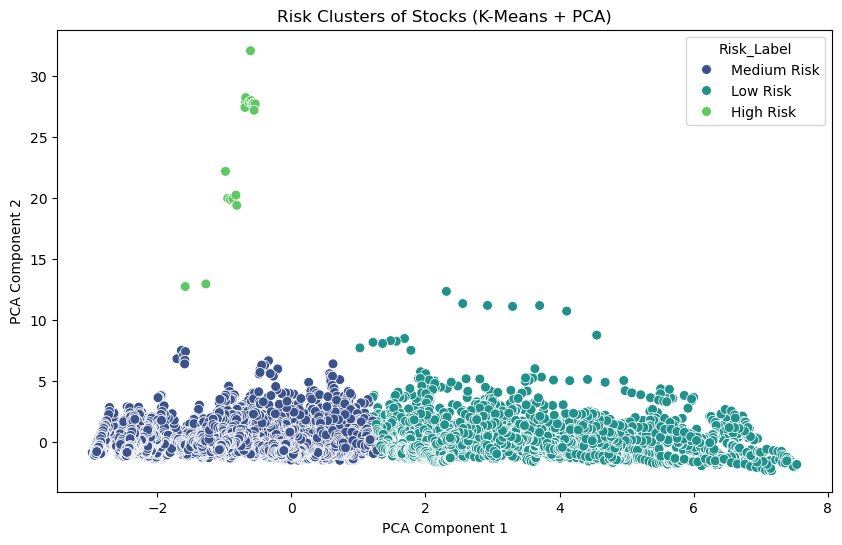

In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select relevant features for clustering
features = data[['daily_return', 'Volatility_7d', 'Volatility_14d', 'SMA_7', 'SMA_14', 'SMA_20', 'MACD', 'EMA_7', 'EMA_14']]

# Step 2: Scale the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=22)
data['Risk_Cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Label the clusters as Low, Medium, and High risk
# Optionally, analyze cluster means to assign proper labels
cluster_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
data['Risk_Label'] = data['Risk_Cluster'].map(cluster_mapping)

# Step 5: Visualize clusters with PCA (2D reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], 
                hue=data['Risk_Label'], palette='viridis', s=50)
plt.title('Risk Clusters of Stocks (K-Means + PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 6: Save results (Optional)
data[['date', 'symbol', 'Risk_Label']].to_csv('stock_risk_clusters.csv', index=False)

In [165]:
df = pd.read_csv('stock_risk_clusters.csv')

In [166]:
df.tail(20)

,date,symbol,Risk_Label
14273,2023-12-01 00:00:00+00:00,XOM,Medium Risk
14274,2023-12-04 00:00:00+00:00,XOM,Medium Risk
14275,2023-12-05 00:00:00+00:00,XOM,Medium Risk
14276,2023-12-06 00:00:00+00:00,XOM,Medium Risk
14277,2023-12-07 00:00:00+00:00,XOM,Medium Risk
14278,2023-12-08 00:00:00+00:00,XOM,Medium Risk
14279,2023-12-11 00:00:00+00:00,XOM,Medium Risk
14280,2023-12-12 00:00:00+00:00,XOM,Medium Risk
14281,2023-12-13 00:00:00+00:00,XOM,Medium Risk
14282,2023-12-14 00:00:00+00:00,XOM,Medium Risk


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [168]:
data.head()

,date,symbol,open,high,low,close,adj_close,volume,daily_return,SMA_7,...,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Risk_Cluster,Risk_Label
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0,-0.012692,175.43857,...,182.009995,177.830002,182.880005,177.710007,182.009995,182.009995,182.009995,0.000000,1,Medium Risk
52,2022-01-04 00:00:00+00:00,AAPL,182.630005,182.940002,179.119995,179.699997,176.998337,99310400.0,-0.012692,175.43857,...,182.009995,177.830002,182.880005,177.710007,182.009995,181.654610,181.838884,-0.184273,1,Medium Risk
78,2022-01-05 00:00:00+00:00,AAPL,179.610001,180.169998,174.639999,174.919998,172.290207,94537600.0,-0.026600,175.43857,...,182.009995,177.830002,182.880005,177.710007,182.009995,180.618516,181.326374,-0.707857,1,Medium Risk
106,2022-01-06 00:00:00+00:00,AAPL,172.699997,175.300003,171.639999,172.000000,169.414108,96904000.0,-0.016693,175.43857,...,179.699997,177.830002,182.880005,177.710007,182.009995,179.292591,180.635531,-1.342941,1,Medium Risk
137,2022-01-07 00:00:00+00:00,AAPL,172.889999,174.139999,171.029999,172.169998,169.581558,86709100.0,0.000988,175.43857,...,174.919998,182.630005,182.940002,179.119995,179.699997,178.196807,180.008455,-1.811647,1,Medium Risk


In [169]:
data['Year'] = data['date'].dt.year
data['Day'] = data['date'].dt.day

In [170]:
data.dropna()

,date,symbol,open,high,low,close,adj_close,volume,daily_return,SMA_7,...,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Risk_Cluster,Risk_Label,Year,Day
0,2022-01-03 00:00:00+00:00,AAPL,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0,-0.012692,175.438570,...,182.880005,177.710007,182.009995,182.009995,182.009995,0.000000,1,Medium Risk,2022,3
52,2022-01-04 00:00:00+00:00,AAPL,182.630005,182.940002,179.119995,179.699997,176.998337,99310400.0,-0.012692,175.438570,...,182.880005,177.710007,182.009995,181.654610,181.838884,-0.184273,1,Medium Risk,2022,4
78,2022-01-05 00:00:00+00:00,AAPL,179.610001,180.169998,174.639999,174.919998,172.290207,94537600.0,-0.026600,175.438570,...,182.880005,177.710007,182.009995,180.618516,181.326374,-0.707857,1,Medium Risk,2022,5
106,2022-01-06 00:00:00+00:00,AAPL,172.699997,175.300003,171.639999,172.000000,169.414108,96904000.0,-0.016693,175.438570,...,182.880005,177.710007,182.009995,179.292591,180.635531,-1.342941,1,Medium Risk,2022,6
137,2022-01-07 00:00:00+00:00,AAPL,172.889999,174.139999,171.029999,172.169998,169.581558,86709100.0,0.000988,175.438570,...,182.940002,179.119995,179.699997,178.196807,180.008455,-1.811647,1,Medium Risk,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2022-01-20 00:00:00+00:00,XOM,72.500000,74.370003,72.260002,73.269997,66.441154,26774600.0,0.002188,72.064285,...,72.150002,70.599998,71.870003,70.383653,67.936510,2.447144,1,Medium Risk,2022,20
404,2022-01-21 00:00:00+00:00,XOM,73.180000,73.180000,71.040001,72.169998,65.443672,35995200.0,-0.015013,72.181428,...,73.879997,72.010002,73.080002,70.658476,68.250101,2.408374,1,Medium Risk,2022,21
432,2022-01-24 00:00:00+00:00,XOM,70.879997,73.080002,69.809998,72.790001,66.005882,41507000.0,0.008591,72.417143,...,73.860001,72.550003,73.110001,70.986403,68.586390,2.400012,1,Medium Risk,2022,24
461,2022-01-25 00:00:00+00:00,XOM,72.589996,75.239998,71.389999,74.930000,67.946442,39278400.0,0.029400,73.031429,...,74.370003,72.260002,73.269997,71.593110,69.056287,2.536823,1,Medium Risk,2022,25


In [171]:
X = data.drop(['Risk_Label','date', 'RSI_14','Risk_Cluster'], axis= 1)
y = data['Risk_Label']


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 20)

In [173]:
from sklearn.preprocessing import LabelEncoder

# Optional: Encode 'symbol' column if it's necessary for the model
if 'symbol' in X_train.columns:
    le = LabelEncoder()
    X_train['symbol'] = le.fit_transform(X_train['symbol'])
    X_test['symbol'] = le.transform(X_test['symbol'])  # If you have a test set

# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [174]:
X_train.head()

,symbol,open,high,low,close,adj_close,volume,daily_return,SMA_7,SMA_14,...,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Year,Day
9010,27,214.410004,216.910004,213.669998,216.369995,213.860016,8372200.0,-0.010473,218.715714,219.913572,...,214.470001,219.029999,219.119995,215.479996,216.139999,219.477877,221.170196,-1.692319,2023,15
9870,17,296.700012,299.570007,292.730011,295.369995,291.911957,64599200.0,0.072435,285.892857,286.667143,...,281.769989,285.010010,286.269989,283.059998,285.760010,285.637090,281.753539,3.883552,2023,26
9193,14,330.890015,335.339996,330.209991,332.640015,328.857727,2703400.0,0.005046,330.924286,324.430714,...,331.079987,329.179993,333.940002,329.010010,333.600006,327.884473,328.149620,-0.265147,2023,23
7832,20,127.800003,128.589996,126.000000,126.430000,123.337975,6828800.0,-0.013345,127.134286,123.170715,...,128.850006,128.350006,128.460007,126.459999,127.889999,124.298198,119.121603,5.176594,2023,18
9452,18,77.900002,78.949997,77.739998,78.330002,75.000946,8200400.0,0.015163,76.740000,75.946429,...,76.669998,76.769997,77.120003,75.980003,77.080002,76.337077,75.704304,0.632773,2023,5


In [175]:
X_train.dropna()

,symbol,open,high,low,close,adj_close,volume,daily_return,SMA_7,SMA_14,...,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Year,Day
9010,27,214.410004,216.910004,213.669998,216.369995,213.860016,8372200.0,-0.010473,218.715714,219.913572,...,214.470001,219.029999,219.119995,215.479996,216.139999,219.477877,221.170196,-1.692319,2023,15
9870,17,296.700012,299.570007,292.730011,295.369995,291.911957,64599200.0,0.072435,285.892857,286.667143,...,281.769989,285.010010,286.269989,283.059998,285.760010,285.637090,281.753539,3.883552,2023,26
9193,14,330.890015,335.339996,330.209991,332.640015,328.857727,2703400.0,0.005046,330.924286,324.430714,...,331.079987,329.179993,333.940002,329.010010,333.600006,327.884473,328.149620,-0.265147,2023,23
7832,20,127.800003,128.589996,126.000000,126.430000,123.337975,6828800.0,-0.013345,127.134286,123.170715,...,128.850006,128.350006,128.460007,126.459999,127.889999,124.298198,119.121603,5.176594,2023,18
9452,18,77.900002,78.949997,77.739998,78.330002,75.000946,8200400.0,0.015163,76.740000,75.946429,...,76.669998,76.769997,77.120003,75.980003,77.080002,76.337077,75.704304,0.632773,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19,446.149994,447.510010,430.899994,431.959991,431.959991,8745500.0,-0.029892,429.597137,414.399285,...,440.859985,430.010010,437.269989,428.399994,435.730011,418.104703,394.254643,23.850060,2023,16
6139,14,346.519989,352.329987,343.049988,351.309998,345.232361,2513100.0,0.009802,338.018572,333.235005,...,340.769989,331.149994,331.440002,325.899994,329.070007,336.011462,328.909861,7.101601,2022,25
3824,15,322.350006,324.859985,319.519989,324.070007,319.736328,2202100.0,0.012181,319.728577,319.086430,...,319.260010,314.100006,318.940002,311.309998,318.239990,322.242606,328.169705,-5.927099,2022,7
265,9,133.899994,136.050003,133.559998,134.759995,118.980370,4868300.0,0.008758,134.948569,134.114286,...,132.869995,134.470001,136.199997,133.380005,135.029999,135.156383,135.602605,-0.446222,2022,13


In [176]:
X_train.isna().sum()

symbol            0
open              0
high              0
low               0
close             0
adj_close         0
volume            0
daily_return      0
SMA_7             0
SMA_14            0
EMA_7             0
EMA_14            0
Volatility_7d     0
Volatility_14d    0
SMA_20            0
BB_Upper          0
BB_Lower          0
Day_of_Week       0
Month             0
Quarter           0
Open_Lag_1        0
High_Lag_1        0
Low_Lag_1         0
Close_Lag_1       0
Open_Lag_2        0
High_Lag_2        0
Low_Lag_2         0
Close_Lag_2       0
Open_Lag_3        0
High_Lag_3        0
Low_Lag_3         0
Close_Lag_3       0
EMA_12            0
EMA_26            0
MACD              0
Year              0
Day               0
dtype: int64

In [177]:
y_train.dropna()

9010        Low Risk
9870        Low Risk
9193        Low Risk
7832     Medium Risk
9452     Medium Risk
            ...     
10953       Low Risk
6139        Low Risk
3824        Low Risk
265      Medium Risk
12874    Medium Risk
Name: Risk_Label, Length: 10719, dtype: object

In [178]:
model = RandomForestClassifier(random_state = 44)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [179]:
y_pred = model.predict(X_test)

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00         7
    Low Risk       1.00      0.99      0.99       775
 Medium Risk       1.00      1.00      1.00      2792

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



In [181]:
X_train.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'daily_return', 'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'Volatility_7d',
       'Volatility_14d', 'SMA_20', 'BB_Upper', 'BB_Lower', 'Day_of_Week',
       'Month', 'Quarter', 'Open_Lag_1', 'High_Lag_1', 'Low_Lag_1',
       'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2', 'Close_Lag_2',
       'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3', 'EMA_12',
       'EMA_26', 'MACD', 'Year', 'Day'],
      dtype='object')

In [182]:
X_train.head()

,symbol,open,high,low,close,adj_close,volume,daily_return,SMA_7,SMA_14,...,Close_Lag_2,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Year,Day
9010,27,214.410004,216.910004,213.669998,216.369995,213.860016,8372200.0,-0.010473,218.715714,219.913572,...,214.470001,219.029999,219.119995,215.479996,216.139999,219.477877,221.170196,-1.692319,2023,15
9870,17,296.700012,299.570007,292.730011,295.369995,291.911957,64599200.0,0.072435,285.892857,286.667143,...,281.769989,285.010010,286.269989,283.059998,285.760010,285.637090,281.753539,3.883552,2023,26
9193,14,330.890015,335.339996,330.209991,332.640015,328.857727,2703400.0,0.005046,330.924286,324.430714,...,331.079987,329.179993,333.940002,329.010010,333.600006,327.884473,328.149620,-0.265147,2023,23
7832,20,127.800003,128.589996,126.000000,126.430000,123.337975,6828800.0,-0.013345,127.134286,123.170715,...,128.850006,128.350006,128.460007,126.459999,127.889999,124.298198,119.121603,5.176594,2023,18
9452,18,77.900002,78.949997,77.739998,78.330002,75.000946,8200400.0,0.015163,76.740000,75.946429,...,76.669998,76.769997,77.120003,75.980003,77.080002,76.337077,75.704304,0.632773,2023,5


In [183]:
data.columns

Index(['date', 'symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'daily_return', 'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'Volatility_7d',
       'Volatility_14d', 'RSI_14', 'SMA_20', 'BB_Upper', 'BB_Lower',
       'Day_of_Week', 'Month', 'Quarter', 'Open_Lag_1', 'High_Lag_1',
       'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2',
       'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3',
       'EMA_12', 'EMA_26', 'MACD', 'Risk_Cluster', 'Risk_Label', 'Year',
       'Day'],
      dtype='object')

In [184]:
# from sklearn.preprocessing import StandardScaler

# # Separate features and target
# X = data[['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_return',
#           'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 'Volatility_7d', 'Volatility_14d',
#           'SMA_20', 'BB_Upper', 'BB_Lower', 'Day_of_Week', 'Month', 'Quarter',
#           'Open_Lag_1', 'High_Lag_1', 'Low_Lag_1', 'Close_Lag_1',
#           'Open_Lag_2', 'High_Lag_2', 'Low_Lag_2', 'Close_Lag_2',
#           'Open_Lag_3', 'High_Lag_3', 'Low_Lag_3', 'Close_Lag_3',
#           'EMA_12', 'EMA_26', 'MACD', 'Year', 'Day']]
# y = data['target']  # Replace 'target' with the actual target column name

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both the training and test sets
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the Support Vector Classifier
# svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=30)

# # Train the model on the scaled training data
# svm_model.fit(X_train_scaled, y_train)

# # Make predictions on the scaled test data
# y_pred = svm_model.predict(X_test_scaled)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# Print the results
#print("Accuracy:", accuracy)
#print("\nClassification Report:\n", report)


NameError: name 'accuracy' is not defined

In [185]:
import pandas as pd

# Sample data (assuming data is your DataFrame)
# Only numeric columns are selected
columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume',
           'daily_return', 'SMA_7', 'SMA_14', 'EMA_7', 'EMA_14', 
           'Volatility_7d', 'Volatility_14d', 'RSI_14', 'SMA_20', 
           'BB_Upper', 'BB_Lower', 'Open_Lag_1', 'High_Lag_1', 
           'Low_Lag_1', 'Close_Lag_1', 'Open_Lag_2', 'High_Lag_2', 
           'Low_Lag_2', 'Close_Lag_2', 'Open_Lag_3', 'High_Lag_3', 
           'Low_Lag_3', 'Close_Lag_3', 'EMA_12', 'EMA_26', 'MACD', 
           'Year', 'Day', 'Risk_Cluster']

# Select only the necessary columns
df_numeric = data[columns]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display correlation of each column with 'Risk_Cluster'
risk_corr = correlation_matrix['Risk_Cluster'].sort_values(ascending=False)

# Print the correlations
print(risk_corr)


Risk_Cluster      1.000000
volume            0.070416
RSI_14            0.029018
daily_return      0.006422
Day               0.003113
Year              0.002371
Volatility_7d    -0.067802
Volatility_14d   -0.080082
MACD             -0.110041
BB_Lower         -0.831092
low              -0.838315
Low_Lag_1        -0.838557
Low_Lag_2        -0.838768
Low_Lag_3        -0.838883
close            -0.839473
open             -0.839597
Close_Lag_1      -0.839746
Open_Lag_1       -0.839828
Open_Lag_2       -0.839960
Open_Lag_3       -0.839963
Close_Lag_2      -0.839990
SMA_20           -0.840097
Close_Lag_3      -0.840139
EMA_26           -0.840396
SMA_7            -0.840581
SMA_14           -0.840668
EMA_7            -0.840758
high             -0.840774
High_Lag_1       -0.841014
EMA_12           -0.841041
EMA_14           -0.841047
High_Lag_2       -0.841199
High_Lag_3       -0.841245
BB_Upper         -0.842510
adj_close        -0.843421
Name: Risk_Cluster, dtype: float64


In [62]:
# # Import necessary libraries
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the Support Vector Classifier
# svm_model = SVC(kernel='linear',decision_function_shape = 'ovr', random_state=30)

# # Train the model on the training data
# svm_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = svm_model.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Print the results
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", report)

In [190]:
df_numeric.head()

,open,high,low,close,adj_close,volume,daily_return,SMA_7,SMA_14,EMA_7,...,Open_Lag_3,High_Lag_3,Low_Lag_3,Close_Lag_3,EMA_12,EMA_26,MACD,Year,Day,Risk_Cluster
0,177.830002,182.880005,177.710007,182.009995,179.273605,104487900.0,-0.012692,175.43857,172.272143,182.009995,...,177.830002,182.880005,177.710007,182.009995,182.009995,182.009995,0.000000,2022,3,1
52,182.630005,182.940002,179.119995,179.699997,176.998337,99310400.0,-0.012692,175.43857,172.272143,181.432495,...,177.830002,182.880005,177.710007,182.009995,181.654610,181.838884,-0.184273,2022,4,1
78,179.610001,180.169998,174.639999,174.919998,172.290207,94537600.0,-0.026600,175.43857,172.272143,179.804371,...,177.830002,182.880005,177.710007,182.009995,180.618516,181.326374,-0.707857,2022,5,1
106,172.699997,175.300003,171.639999,172.000000,169.414108,96904000.0,-0.016693,175.43857,172.272143,177.853278,...,177.830002,182.880005,177.710007,182.009995,179.292591,180.635531,-1.342941,2022,6,1
137,172.889999,174.139999,171.029999,172.169998,169.581558,86709100.0,0.000988,175.43857,172.272143,176.432458,...,182.630005,182.940002,179.119995,179.699997,178.196807,180.008455,-1.811647,2022,7,1


In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Compute the correlation matrix
correlation_matrix = data.corr()

# Get features with an absolute correlation greater than 0.7 with 'Risk_Cluster'
high_corr_features = correlation_matrix['Risk_Cluster'][
    correlation_matrix['Risk_Cluster'].abs() > 0.7].index.tolist()

# Remove 'Risk_Cluster' from the feature list if it's included
if 'Risk_Cluster' in high_corr_features:
    high_corr_features.remove('Risk_Cluster')

# Prepare data with the highly correlated features only
X = data[high_corr_features]
y = data['Risk_Cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=30)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


ValueError: could not convert string to float: 'AAPL'